# COURSE:   PGP [AI&ML]

## Learner :  Chaitanya Kumar Battula
## Module  : Machine Learning
## Topic   : Time Series Modeling-1

# Time Series Modeling

Table of contents
QnA
Import Libraries
Read Data
Data Transformation to achieve Stationarity
Log Scale Transformation
Exponential Decay Transformation
Time Shift Transformation
Plotting ACF & PACF
Building Models
Prediction & Reverse transformations
QnA 
1. What is Time series analysis?
A. Time Series is a series of observations taken at specified time intervals usually equal intervals. Analysis of the series helps us to predict future values based on previous observed values. In Time series, we have only 2 variables, time & the variable we want to forecast.

2. Why & where Time Series is used?
A. Time series data can be analysed in order to extract meaningful statistics and other charecteristsics. It's used in atleast the 4 scenarios:
a) Business Forecasting
b) Understand past behavior
c) Plan the future
d) Evaluate current accomplishment

3. When shouldn't we use Time Series Analysis?
A. We don't need to apply Time series in atleast the following 2 cases:
a) The dependant variable(y) (that is supposed to vary with time) is constant. Eq: y=f(x)=4, a line parallel to x-axis(time) will always remain the same.
b) The dependant variable(y) represent values that can be denoted as a mathematical function. Eq: sin(x), log(x), Polynomials etc. Thus, we can directly get value at some time using the function itself. No need of forecasting.

4. What are the components of Time Series?
A. There are 4 components:
a) Trend - Upward & downward movement of the data with time over a large period of time. Eq: Appreciation of Dollar vs rupee.
b) Seasonality - seasonal variances. Eq: Ice cream sales increases in Summer only
c) Noise or Irregularity - Spikes & troughs at random intervals
d) Cyclicity - behavior that repeats itself after large interval of time, like months, years etc.

5. What is Stationarity?
A. Before applying any statistical model on a Time Series, the series has to be staionary, which means that, over different time periods,
a) It should have constant mean.
b) It should have constant variance or standard deviation.
c) Auto-covariance should not depend on time.

Trend & Seasonality are two reasons why a Time Series is not stationaru & hence need to be corrected.

6. Why does Time Series(TS) need to be stationary?
A. It is because of the following reasons:
a) If a TS has a particular behavior over a time interval, then there's a high probability that over a different interval, it will have same behavior, provided TS is stationary. This helps in forecasting accurately.
b) Theories & Mathematical formulas ae more mature & easier to apply for as TS which is stationary.

7. Tests to check if a series is stationary or not
A. There are 2 ways to check for Stationarity of a TS:
a) Rolling Statistics - Plot the moving avg or moving standard deviation to see if it varies with time. Its a visual technique.
b) ADCF Test - Augmented Dickey–Fuller test is used to gives us various values that can help in identifying stationarity. The Null hypothesis says that a TS is non-stationary. It comprises of a Test Statistics & some critical values for some confidence levels. If the Test statistics is less than the critical values, we can reject the null hypothesis & say that the series is stationary. THE ADCF test also gives us a p-value. Acc to the null hypothesis, lower values of p is better.

8. What is ARIMA model?
A. ARIMA(Auto Regressive Integrated Moving Average) is a combination of 2 models AR(Auto Regressive) & MA(Moving Average). It has 3 hyperparameters - P(auto regressive lags),d(order of differentiation),Q(moving avg.) which respectively comes from the AR, I & MA components. The AR part is correlation between prev & current time periods. To smooth out the noise, the MA part is used. The I part binds together the AR & MA parts.

9. How to find value of P & Q for ARIMA ?
A. We need to take help of ACF(Auto Correlation Function) & PACF(Partial Auto Correlation Function) plots. ACF & PACF graphs are used to find value of P & Q for ARIMA. We need to check, for which value in x-axis, graph line drops to 0 in y-axis for 1st time.
From PACF(at y=0), get P
From ACF(at y=0), get Q

10. What Is ADCF test?
A. In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity. It is an augmented version of the Dickey–Fuller test for a larger and more complicated set of time series models.

The augmented Dickey–Fuller (ADF) statistic, used in the test, is a negative number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.

p value(0<=p<=1) should be as low as possible. Critical values at different confidence intervals should be close to the Test statistics value.

11. What is Exponential Smoothing?
A. Exponential smoothing is a rule of thumb technique for smoothing time series data using the exponential window function. Whereas in the simple moving average the past observations are weighted equally, exponential functions are used to assign exponentially decreasing weights over time. It is an easily learned and easily applied procedure for making some determination based on prior assumptions by the user, such as seasonality. Exponential smoothing is often used for analysis of time-series data.

The raw data sequence is often represented by  xt  beginning at time  t=0 , and the output of the exponential smoothing algorithm is commonly written as  st , which may be regarded as a best estimate of what the next value of  x  will be. When the sequence of observations begins at time  t=0 , the simplest form of exponential smoothing is given by the formulas:

s0=x0 
st=α∗xt+(1−α)∗st−1  ,  t>0 
where  α  is the smoothing factor, and  0<α<1 .

12. What is Exponential decay?
A. A quantity is subject to exponential decay if it decreases at a rate proportional to its current value. Symbolically, this process can be expressed by the following differential equation, where N is the quantity and λ (lambda) is a positive rate called the exponential decay constant:

dN/dt=−λN 
The solution to this equation (see derivation below) is:
N(t)=N0∗e−λt 
where N(t) is the quantity at time t, and N0 = N(0) is the initial quantity, i.e. the quantity at time t = 0.

Half Life is the time required for the decaying quantity to fall to one half of its initial value. It is denoted by  t1/2 . The half-life can be written in terms of the decay constant as:

t1/2=ln(2)/λ


## Import Libraries

In [1]:
from datetime import datetime

import numpy as np             
import pandas as pd            
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

%matplotlib inline             

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')

## Read Data 


Time series deals with 2 columns, one is temporal ie: month in this case & another is the value to be forecasted ie: airplane passengers. To make plotting graphs easier, we set the index of pandas dataframe to the Month. During plots, the index will act by default as the x-axis & since it has only 1 more column, that will be automatically taken as the y-axis

In [2]:
file = "AirPassengers.csv"
data = pd.read_csv(file)
data.head()


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
#Parse strings to datetime type
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data=data.set_index(['Month'])
data.head()


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## plot graph

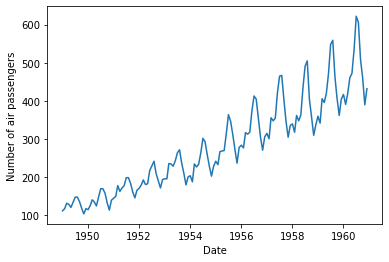

In [4]:
ts = data['#Passengers']
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(ts)

From the plot above, we can see that there is a Trend compoenent in th series. Hence, we now check for stationarity of the data

## Check for stationarity of the data - By Rolling statistics

In [5]:
rolmean = ts.rolling(window=12).mean() 
rolstd  = ts.rolling(window=12).std()
print("rolmean:", rolmean)
print("\n")
print("rolstd:", rolstd)

rolmean: Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: #Passengers, Length: 144, dtype: float64


rolstd: Month
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
                ...    
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125
Name: #Passengers, Length: 144, dtype: float64


## Plot rolling statistics

In [6]:
def test_stationary(timeseries):
    rolmean = ts.rolling(window=12, center=False).mean() 
    rolsts = ts.rolling(window=12, centre=False).std()     
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std  = plt.plot(rolstd, color='black', label='Rolling Std')

    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolog='AIC')
    

From the above graph, 
we see that rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time. 

For our time series to be stationary, 
we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. 

Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so.
To further augment our hypothesis that the time series is not stationary, let us perform the ADCF test.

## Perform Augmented Dickey–Fuller test:

In [8]:

print('Results of Dickey Fuller Test:')
dftest = adfuller(data['#Passengers'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


For a Time series to be stationary, its ADCF test should have:
p-value to be low (according to the null hypothesis)
The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics

From the above ADCF test result, we see that p-value(at max can be 1.0) is very large. 
Also critical values are no where close to the Test Statistics. 
Hence, we can safely say that our Time Series at the moment is not stationary

## Data Transformation to achieve Stationarity

There are a couple of ways to achieve stationarity through data transformation like taking  log10 , loge , square, square root, cube, cube root, exponential decay, time shift and so on ...

In our notebook, 
lets start of with log transformations. 
Our objective is to remove the trend component. 
Hence, flatter curves( ie: paralle to x-axis) for time series and rolling mean after taking log would say that our data transformation did a good job.

## Log Scale Transformation 

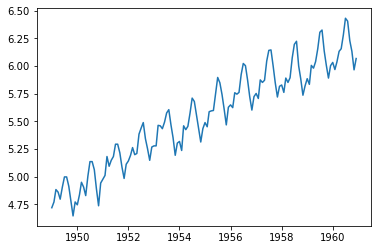

In [10]:
df_logScale = np.log(data)
plt.plot(df_logScale)

In [ ]:
# Transformation to the data, to make series stationary

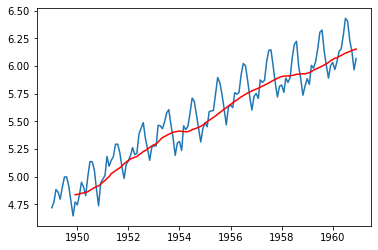

In [11]:

movingAverage = df_logScale.rolling(window=12).mean()
movingSTD = df_logScale.rolling(window=12).std()

plt.plot(df_logScale)
plt.plot(movingAverage, color='red')